# Name : sabiha mohamad
# Id: 8896658

## PART -A ##

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy. 

In [162]:
import pandas as pd

In [163]:
# Load the dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 1: Data Preprocessing

In [164]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display the columns with null values
columns_with_null = null_values[null_values > 0]
print("Columns with null values:")
print(columns_with_null)

# Count the total number of null values in the dataset
total_null_values = null_values.sum()
print("Total null values:", total_null_values)

Columns with null values:
Series([], dtype: int64)
Total null values: 0


In [165]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [166]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [167]:
print(data.describe())

                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [168]:
#duplicate rows
duplicate_rows = data[data.duplicated()]
sum_of_duplicate_rows = duplicate_rows.sum()
print("Sum of Duplicate Rows:")
print(sum_of_duplicate_rows)



Sum of Duplicate Rows:
Time      1.032831e+08
V1       -1.678849e+03
V2        1.173138e+03
V3       -4.576839e+02
V4        8.416186e+02
V5       -5.185263e+02
V6        3.233024e+02
V7       -5.109031e+02
V8        2.424304e+02
V9        4.528833e+02
V10       4.087670e+02
V11      -5.724389e+01
V12       2.028038e+02
V13      -1.711934e+02
V14      -7.158898e+01
V15      -2.958803e+02
V16      -3.296932e+02
V17      -4.827908e+01
V18      -4.298920e+02
V19       7.497845e+01
V20      -5.310648e+01
V21       1.051469e+02
V22       4.263710e+00
V23      -5.622619e+01
V24      -6.077605e+01
V25       6.593423e+01
V26      -4.240032e+01
V27      -5.002179e+02
V28      -1.552867e+02
Amount    6.058833e+04
Class     1.900000e+01
dtype: float64


In [169]:
# Checking Duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 1081


In [170]:
print(duplicate_rows)

            Time        V1        V2        V3        V4        V5        V6   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  \
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

dropping the duplicate rows

In [171]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

In [172]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


In [173]:
# Scale the features using standardization
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


The "Time" column is a continuous variable that represents the timing of the transactions but doesn't directly indicate whether a transaction is fraudulent.

In [174]:
#  droping Time column as there is no use of it .
data = data.drop('Time', axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [175]:
# Count the number of normal (Class=0) and fraud (Class=1) transactions
normal_transactions = data[data["Class"] == 0].shape[0]
fraud_transactions = data[data["Class"] == 1].shape[0]

print("Number of Normal Transactions:", normal_transactions)
print("Number of Fraud Transactions:", fraud_transactions)

Number of Normal Transactions: 283253
Number of Fraud Transactions: 473


#  Train-Test Split

In [176]:

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [177]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [178]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9261,1.062798,-0.007554,1.169893,1.694109,-0.559090,0.527767,-0.608457,0.254902,1.958445,-0.442814,...,-0.269189,-0.175983,0.050427,-0.040761,0.185224,0.516446,-0.325208,0.039374,0.007193,-0.317384
76107,0.847556,-0.338382,-0.191249,0.644180,-0.183540,-0.714065,0.632148,-0.252654,-0.251573,-0.201071,...,0.294179,-0.230173,-1.113621,-0.005678,0.078580,0.146345,0.145774,-0.084227,0.041947,0.484736
240188,0.128523,-0.516833,-0.142250,-0.928846,0.527405,-0.707555,0.005645,-0.057433,-1.121318,0.510696,...,-0.373181,0.107889,0.729755,-0.064491,-0.465817,-0.107939,-0.024985,0.029513,-0.020921,-0.240387
51280,-0.681253,-3.310937,-0.269365,1.180375,-0.761417,2.582536,0.234441,0.505835,1.011396,-0.922163,...,1.601252,0.395436,-0.489844,-0.710257,-1.720611,-0.280947,0.460254,-0.090716,0.156289,3.266176
30734,1.268610,0.069977,0.331383,0.725081,-0.315020,-0.434386,-0.032536,-0.105304,0.499264,-0.192168,...,-0.106359,-0.265292,-0.576113,-0.048183,-0.082980,0.520402,0.300388,-0.022789,0.007630,-0.329485


#  Model Training using Logistic Regression

In [179]:
# Step 3: Model Training using Logistic Regression
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

#  Model Evaluation

In [180]:

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

In [181]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9991541154632393


Here the accuracy is high because we hold an imbalance dataset

In [182]:
from sklearn.metrics import precision_score, recall_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8604651162790697
Recall: 0.5522388059701493


In [183]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
mean_prob_fraud = y_prob.mean()
print("Mean probability of fraud:", mean_prob_fraud)


Mean probability of fraud: 0.0015070142558608274


In [184]:
# Confusion matrix
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84972    12]
 [   60    74]]


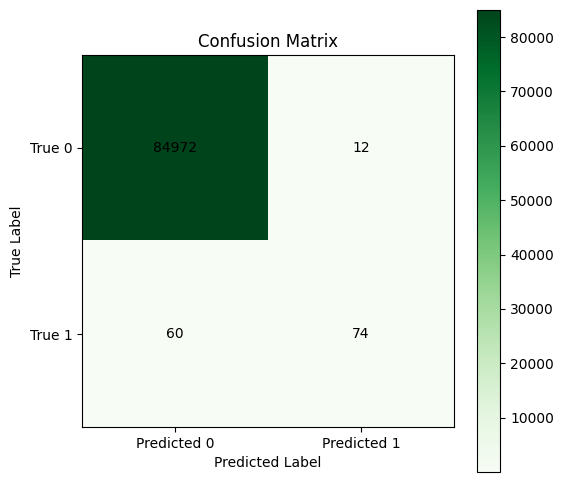

In [185]:
from matplotlib import pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)

# Print the numbers inside the Confusion Matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [186]:
from sklearn.metrics import classification_report

# y_test contains the true labels, and y_pred contains the predicted labels

# Get the classification report
class_report = classification_report(y_test, y_pred)

# Print and display the report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.55      0.67       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



- Although the accuracy is quite high (99.9%), it may not be sufficient as it is an imbalanced dataset ,Here the number of non-fraudulent transactions far outnumbers fraudulent transactions.
- The model's precision is high (86%), which means that when it predicts a fraudulent transaction, it is usually true.
- The model's recall is rather low (55%), implying that some fraudulent transactions were overlooked, providing space for improvement.
- The F1-score takes precision and recall into account and provides a more balanced estimate of the model's performance in class 1. It is 0.67, showing a good mix of precision and recall.
- The confusion matrix reveals the type of errors made by the model: 60 fraudulent transactions were categorised as non-fraudulent , while 12 non-fraudulent transactions were labelled as fraudulent.

# Part B

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 


In [187]:
# Load the dataset
data1 = pd.read_csv('insurance.csv')
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Explore the Data

In [188]:
# Check the summary statistics of the numerical features
print(data1.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [189]:
# Check the data types 
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


#  Data Preprocessing

In [190]:
# Check for missing values
missing_values = data1.isnull().sum()

# Display missing values count for each column
print("Missing Values:")
print(missing_values)

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [191]:
print("Number of duplicate rows:", data1.duplicated().sum())


Number of duplicate rows: 1


In [192]:
# Remove duplicate rows
data1.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
data1.reset_index(drop=True, inplace=True)




a) Convert Categorical Variables to Numerical:

In [193]:
from sklearn.preprocessing import LabelEncoder

# Assuming insurance_data is your DataFrame containing the insurance dataset
le = LabelEncoder()
data1['sex'] = le.fit_transform(data1['sex'])
data1['smoker'] = le.fit_transform(data1['smoker'])
data1['region'] = le.fit_transform(data1['region'])

# Display the updated DataFrame with numerical representation of categorical variables
data1.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


b) Split the Data into Train and Test Sets:
Next, split the dataset into training and testing sets to build and evaluate the model:




In [194]:
from sklearn.model_selection import train_test_split

X = data1.drop("charges", axis=1)
y = data1["charges"]

In [195]:
# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the Linear Regression Model

In [196]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# evaluate the model

In [197]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model using R-squared
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Print the evaluation metrics
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")


R-squared: 0.7724652729621758
Mean Squared Error (MSE): 38935221.010640755
Root Mean Squared Error (RMSE): 6239.809372940872
Mean Absolute Error (MAE): 4182.803777070157


- The R-squared(r2) value is 0.7725, indicating that the model can explain approximately 77.25% of the variance in insurance costs. A higher R-squared value indicates that the model fits the data well.

- MSE (Mean Squared Error): MSE calculates the average squared difference between predicted and actual data. It quantifies the model's average prediction error. The MSE score is 38935221.0106, indicating that the average squared difference between expected and actual insurance costs is around 38,935,221. A lower MSE value indicates improved model performance.

- Root Mean Squared Error (RMSE): The average absolute difference between predicted and actual values is represented by RMSE, which is the square root of MSE. The RMSE number is 6239.8094, which suggests that the average difference between projected and actual insurance costs is $6,239. A lower RMSE number suggests that the model is more accurate.

- Mean Absolute Error (MAE): The average absolute difference between expected and actual values is measured by MAE. It is less susceptible to outliers than MSE. The MAE value is 4182.8038, indicating that the absolute difference between expected and actual insurance prices is about $4,183 on average.

conclusion is The model shows good performance, as it closely matches the data with a high R-squared value. However, it's important to consider the specific problem and what level of accuracy is needed for the application. Depending on the situation, we may need to assess and improve the model further.

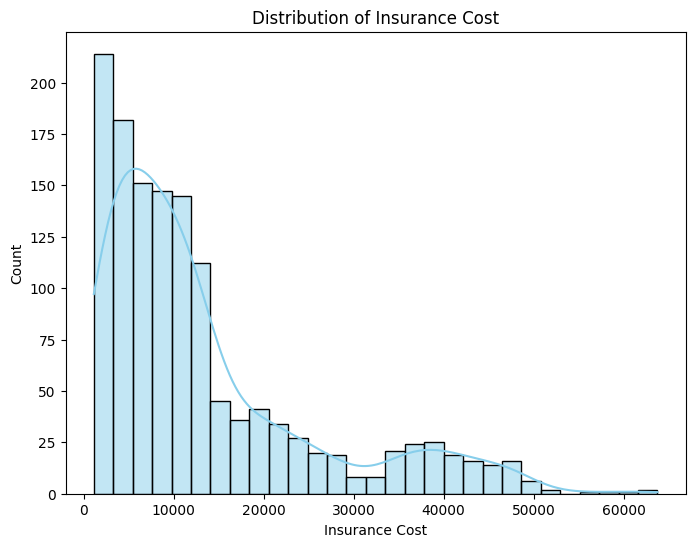

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming insurance_data_encoded is the DataFrame after one-hot encoding the categorical variables

# Plot the distribution of insurance cost (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(data1['charges'], kde=True, color='skyblue')
plt.title('Distribution of Insurance Cost')
plt.xlabel('Insurance Cost')
plt.ylabel('Count')
plt.show()






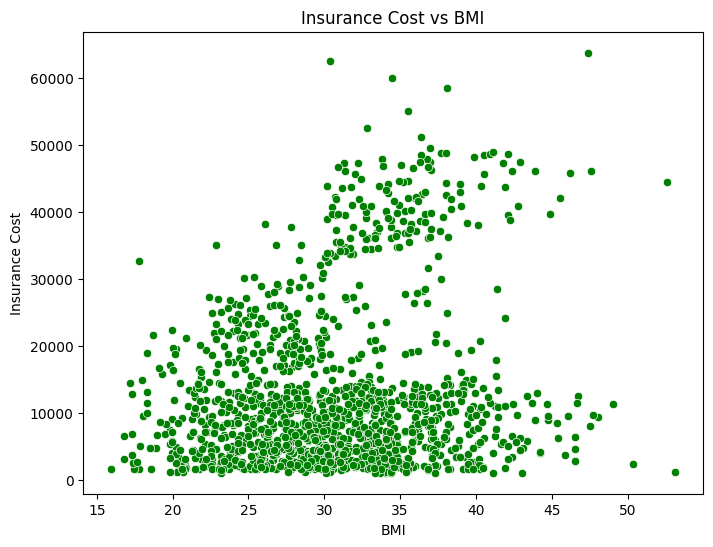

In [199]:
# Plot the relationship between insurance cost and BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=data1, color='green')
plt.title('Insurance Cost vs BMI')
plt.xlabel('BMI')
plt.ylabel('Insurance Cost')
plt.show()

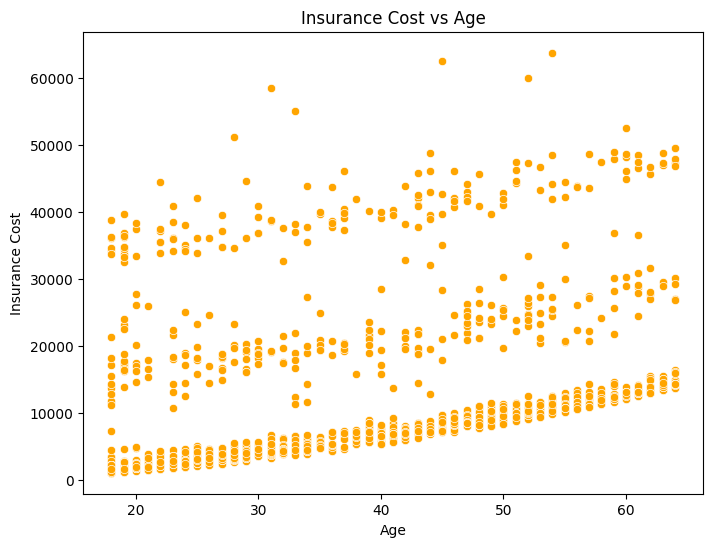

In [200]:
# Plot the relationship between insurance cost and age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=data1, color='orange')
plt.title('Insurance Cost vs Age')
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()

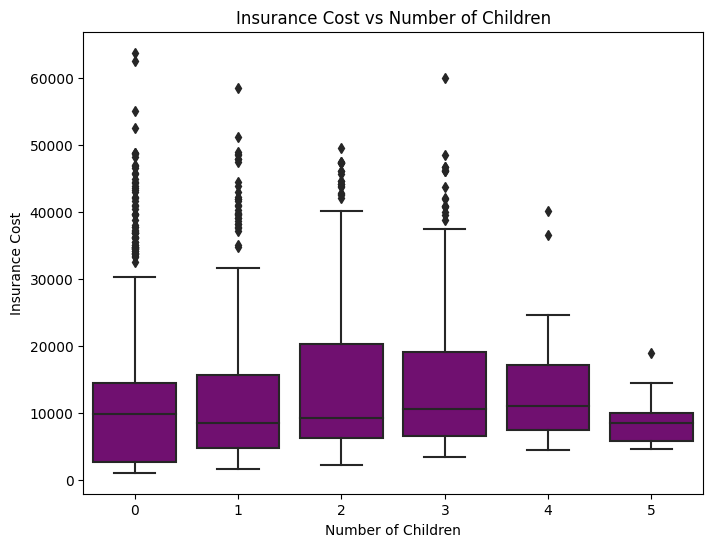

In [201]:

# Plot the relationship between insurance cost and number of children
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', data=data1, color='purple')
plt.title('Insurance Cost vs Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Cost')
plt.show()

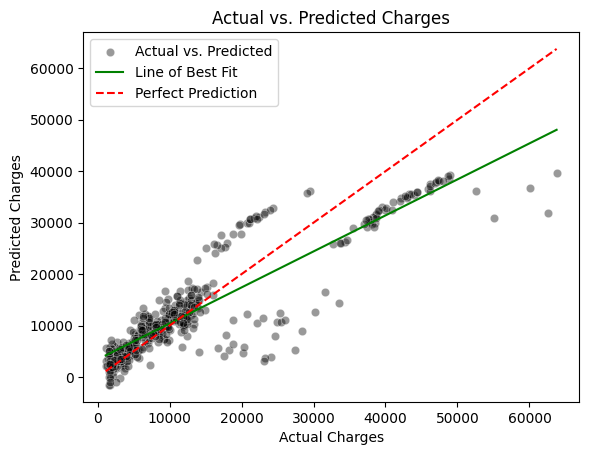

In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Create a scatter plot
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='black', label='Actual vs. Predicted')

# Calculate the line of best fit
fit_line = np.polyfit(y_test, y_pred, 1)

# Generate points for the line of best fit
line_of_best_fit = np.polyval(fit_line, y_test)

# Plot the line of best fit
sns.lineplot(x=y_test, y=line_of_best_fit, color='g', label='Line of Best Fit')

# Plot the line representing a perfect prediction (y_test = y_pred)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Perfect Prediction')

# Set labels and title
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()
